## Dataset Information

This dataset is taken from the UCI ML repository, link here: https://archive.ics.uci.edu/dataset/320/student+performance

The dataset contains two files, both of which contain the same or similar data. One of the files is for a mathematics class and the other one is for a Portuegese class. I will be focusing on the mathematics class data, so the other files have been removed.

## Changelog
### 21/03/2024
- Add dataset.
- Remove Portuegese data from dataset.
- The dataset columns are separated by semicolons (;), which is something I am not used to, I needed to use `sep=;` flag when reading the data into a DataFrame. 
- Get general dataset information.
- Perform label encoding on categorical data
- Create simple neural network
- Added StandardScaler and better model evaluation.

### 22/03/2024
- Reapproach problem, try better data preprocessing
- Rather than focus on all the outputs, G1, G2 and G3, I will focus on just G3.
- Found info about ColumnTransformer which allows me to perform transformations on all columns in a dataset at once, doing different things to each column depending on the datatype. This is hugely helpful and time saving.
- 

In [2]:
import pandas as pd

data_path = 'data/student-mat.csv'
df = pd.read_csv(data_path, sep=';')

Getting general dataset info such as:
- Num features.
- Num instances.
- How much of each data type (numerical, categorical, etc.) there is.

In [3]:
n_features = len(df.columns)
n_instances = len(df)

n_categorical = df.select_dtypes(include=['object']).shape[1]
n_numeric = df.select_dtypes(include=['number']).shape[1]

print(f"Number of features: {n_features}")
print(f"Number of instances: {n_instances}")
print(f"Number of categorical features: {n_categorical}")
print(f"Number of numeric features: {n_numeric}")

Number of features: 33
Number of instances: 395
Number of categorical features: 17
Number of numeric features: 16


Ideally I want to label encode the categorical data for the neural network. First step is to get the number of unique categorical datapoint from each column.

In [4]:
from sklearn import preprocessing

# get unique values for each categorical feature
for col in df.select_dtypes(include=['object']).columns:
    unique_values = df[col].unique()
    print(f"Unique values for {col}: {unique_values}")
print()

# create new labelled df
labelled_df = df.copy()
le = preprocessing.LabelEncoder()
for col in labelled_df.select_dtypes(include=['object']).columns:
    labelled_df[col] = le.fit_transform(labelled_df[col])
    print(f"Label encoded {col}: {labelled_df[col].unique()}")

Unique values for school: ['GP' 'MS']
Unique values for sex: ['F' 'M']
Unique values for address: ['U' 'R']
Unique values for famsize: ['GT3' 'LE3']
Unique values for Pstatus: ['A' 'T']
Unique values for Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Unique values for Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Unique values for reason: ['course' 'other' 'home' 'reputation']
Unique values for guardian: ['mother' 'father' 'other']
Unique values for schoolsup: ['yes' 'no']
Unique values for famsup: ['no' 'yes']
Unique values for paid: ['no' 'yes']
Unique values for activities: ['no' 'yes']
Unique values for nursery: ['yes' 'no']
Unique values for higher: ['yes' 'no']
Unique values for internet: ['no' 'yes']
Unique values for romantic: ['no' 'yes']

Label encoded school: [0 1]
Label encoded sex: [0 1]
Label encoded address: [1 0]
Label encoded famsize: [0 1]
Label encoded Pstatus: [0 1]
Label encoded Mjob: [0 1 2 3 4]
Label encoded Fjob: [4 2 3 1 0]
Label encoded reas

Creating a simple neural network to see what the output looks like and if any changes need to be made.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = labelled_df.drop(['G1', 'G2', 'G3'], axis=1)
y = labelled_df[['G1', 'G2', 'G3']]

def train_model(X: pd.DataFrame, y: pd.DataFrame):
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # build a simple neural network
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # output layer for G1, G2, G3
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # train the model
    model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

    return model, X_test, y_test

model, X_test, y_test = train_model(X, y)

# evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

# make predictions
predictions = model.predict(X_test)
print(f"Predictions: {predictions[:5]}")  # print first 5 predictions

2025-03-22 09:11:50.626477: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-22 09:11:50.759292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742634710.810143    5582 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742634710.837039    5582 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742634710.970762    5582 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Epoch 1/200


/home/jack/College/DataSciML/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-22 09:11:52.698324: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 236.1302 - mae: 14.5990 - val_loss: 125.5149 - val_mae: 10.6185
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 107.2569 - mae: 9.6155 - val_loss: 48.9649 - val_mae: 6.2485
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.7742 - mae: 5.6083 - val_loss: 24.2549 - val_mae: 3.6177
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.6437 - mae: 3.5557 - val_loss: 25.9165 - val_mae: 3.6821
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1301 - mae: 3.5755 - val_loss: 21.3248 - val_mae: 3.4728
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7909 - mae: 3.5009 - val_loss: 16.5893 - val_mae: 3.0826
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.3438 - mae: 3.3371 - val_loss: 15.0408 - val_mae: 2.9284
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.7238 - mae: 3.3357 - val_loss: 13.7493 - val_mae: 2.8283
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1516 - mae

Obviously some improvements can be made, I will do the following:
- One-hot encoding vs labelled encoding to eliminate implied ordinality.
- I will scale the data using StandardScaler
- Better model evaluation and visualisation.

In [6]:
from sklearn.preprocessing import StandardScaler

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
labelled_df = pd.get_dummies(df, columns=categorical_features)

X = labelled_df.drop(['G1', 'G2', 'G3'], axis=1)
y = labelled_df[['G1']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model, X_test, y_test = train_model(X_scaled, y)
y_pred = model.predict(X_test)

Epoch 1/200


/home/jack/College/DataSciML/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 114.3521 - mae: 10.1910 - val_loss: 94.7863 - val_mae: 9.2653
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 92.9866 - mae: 9.0591 - val_loss: 72.3996 - val_mae: 7.9401
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 72.3713 - mae: 7.7734 - val_loss: 50.8608 - val_mae: 6.4192
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 46.8005 - mae: 6.0165 - val_loss: 31.8686 - val_mae: 4.8201
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.2200 - mae: 4.4468 - val_loss: 18.5086 - val_mae: 3.5660
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.8778 - mae: 3.3888 - val_loss: 12.6350 - val_mae: 2.8459
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.5624 - mae: 2.9275 - val_loss: 11.8261 - val_mae: 2.7055
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.9389 - mae: 2.7595 - val_loss: 11.2798 - val_mae: 2.6509
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7000 - mae:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Squared Error: 14.209826901278339
Mean Absolute Error: 3.0223809254320364
R-squared: -0.03927648067474365


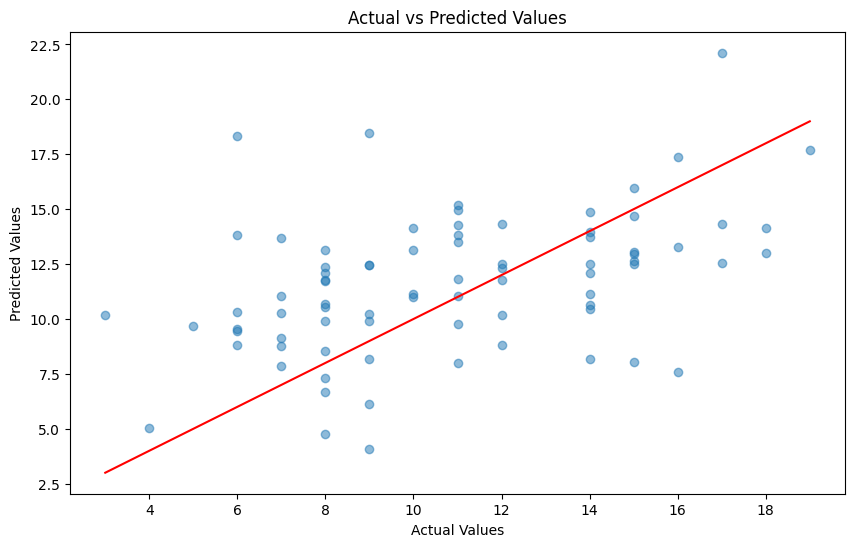

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Since confusion matrix is for classification, we can't directly use it.
# If you want to analyze the prediction errors, you can plot the predicted vs actual values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values.flatten(), y_pred.flatten(), alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot(np.linspace(y_test.min(), y_test.max(), 100), np.linspace(y_test.min(), y_test.max(), 100), color='red')
plt.savefig('actual_vs_predicted.png')
plt.show()

In [48]:
math_df = pd.read_csv('data/student-mat.csv', sep=';')
X = math_df.drop('G3', axis=1)
y = math_df['G3']

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73729)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (316, 32)
X_test shape: (79, 32)


Time to preprocess, using ColumnTransformer to help speed up the process. ColumnTransformer allows me to run StandardScaler on numerical columns and OneHotEncoder on categorical columns with one function.

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# use ColumnTransformer to apply one-hot encoding to categorical features and standard scaler to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# get feature names after transformation
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
num_feature_names = numerical_features

all_feature_names = num_feature_names + cat_feature_names.tolist()

print(f"Transformed feature names: {all_feature_names}")
print(f"Number of features in training set after preprocessing: {X_train_transformed.shape[1]}")

Transformed feature names: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']
Number of features in training set after preprocessing: 58


Create a simple 64x32x16x1 neural network for regression. Using ReLU.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# using dropout to prevent overfitting
# "The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting."
# See: https://keras.io/api/layers/regularization_layers/dropout/

def create_model(input_dim, activation='relu'):
    model = Sequential([
        Dense(64, activation=activation, input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation=activation),
        Dropout(0.2),
        Dense(16, activation=activation),
        Dense(1)  # Output layer for regression requires no activation function
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

input_dim = X_train_transformed.shape[1]
model = create_model(input_dim, activation='relu')

model.summary()

/home/jack/College/DataSciML/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │         3,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

# I use earlyStopping to stop training when the validation loss does not improve for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_transformed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 141.1417 - mae: 10.9787 - val_loss: 139.9362 - val_mae: 10.9926
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125.8912 - mae: 10.1628 - val_loss: 128.1785 - val_mae: 10.5079
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.2166 - mae: 9.6710 - val_loss: 118.3911 - val_mae: 10.0882
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106.1247 - mae: 9.5105 - val_loss: 110.4061 - val_mae: 9.7301
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99.7661 - mae: 9.1354 - val_loss: 104.1957 - val_mae: 9.4406
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90.8785 - mae: 8.8013 - val_loss: 99.2333 - val_mae: 9.2016
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90.1776 - mae: 8.6728 - val_loss: 95.2568 - val_mae: 9.0046
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85.4071 - mae: 8.4885 - val_loss: 91.8786 - val_mae: 8.8332
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

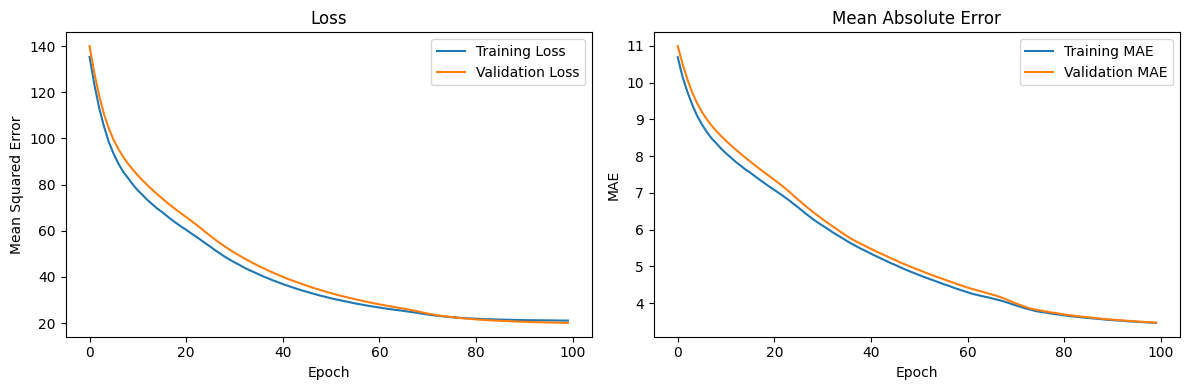

In [53]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_transformed).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error: 22.0088
Root Mean Squared Error: 4.6914
Mean Absolute Error: 3.4301
R² Score: -0.0025


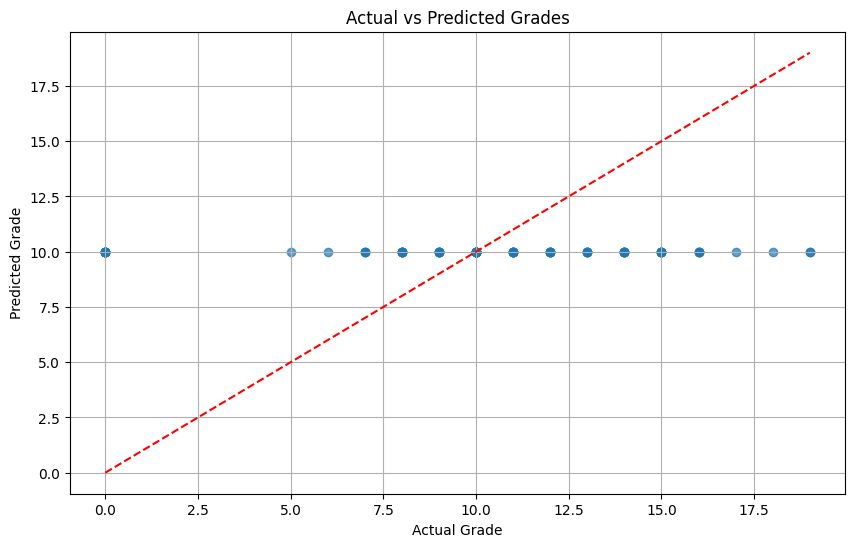

In [55]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Actual vs Predicted Grades')
plt.grid(True)
plt.show()